In [20]:
import sys
import cv2
import numpy as np

import joblib

import matplotlib.pyplot as plt
sys.path.append('../')
from utils import data

In [47]:
model_filename = 'kmeans_model.joblib'
kmeans_loaded = joblib.load(model_filename)



In [57]:
def process_img(img):
    orb=cv2.ORB_create(100)
    feats=cv2.goodFeaturesToTrack(np.mean(img,axis=2).astype(np.uint8),3000,qualityLevel=0.01,minDistance=3)
    kps=[cv2.KeyPoint(x=f[0][0],y=f[0][1],size=20) for f in feats]
    kps,des=orb.compute(img,kps)
    return des

def descriptor(image,dataset_path):
      global kmeans_loaded
      # for i in range(10):
      frame=cv2.imread(dataset_path+image)      
      des=process_img(frame)
      labels = kmeans_loaded.predict(des)
      print(kmeans_loaded.labels_)
      hist, edges = np.histogram(labels, bins=kmeans_loaded.n_clusters)

      
        # Plot histogram
      # plt.hist(hist, bins=150)
      plt.bar(edges[:-1], hist, width=np.diff(edges), edgecolor='black')
      plt.title('Histogram of Random Data')
      plt.xlabel('Values')
      plt.ylabel('Frequency')
      plt.show()


      print("predicted labels:", labels)



        

In [49]:
def update_kmean(dataset_path,i):
    global kmeans
    
    rgb_paths=dataset_path+'rgb.txt'
    
    image_list=data(rgb_paths)
    
    if image_list is None:
        return
    
    des_array=descriptor(image_list[i],dataset_path)

[110  91  17 ...  74  75 111]


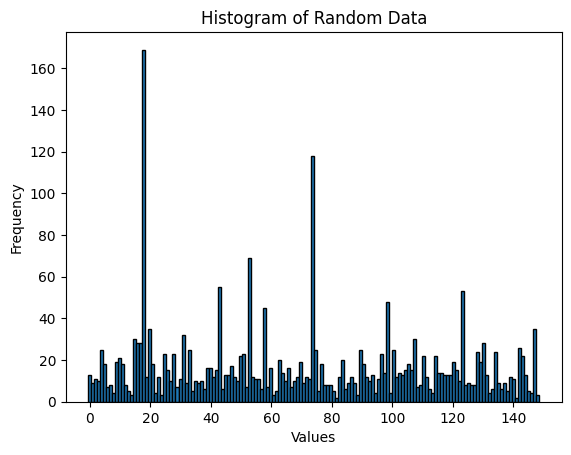

predicted labels: [113  93  96 ... 122  18 120]


In [61]:
dataset_path='../../dataset/rgbd_dataset_freiburg1_floor/'

update_kmean(dataset_path,100)

In [ ]:
dataset_path1='../../dataset/rgbd_dataset_freiburg1_floor/'
update_kmean(dataset_path1)
dataset_path2='../../dataset/rgbd_dataset_freiburg1_xyz/'
update_kmean(dataset_path2)
dataset_path3='../../dataset/rgbd_dataset_freiburg2_floor/'
update_kmean(dataset_path3)
dataset_path4='../../dataset/rgbd_dataset_freiburg2_floor/'
update_kmean(dataset_path4)



In [9]:
import sys
for thing in sys.argv:
    print(thing,end='')


/home/sujan/.local/lib/python3.8/site-packages/ipykernel_launcher.py--f=/home/sujan/.local/share/jupyter/runtime/kernel-v2-45147FtVh6O6L3Tc.json